<a href="https://colab.research.google.com/github/TG5128/MachineLearning/blob/main/Loan_Portfolio_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Investment Portfolio Project (Machine Learning Model - Random Forest Classifier & Logistic Regression)

## Overview

In this project, I will build a machine learning model to predict which loans will be repaid out of the given dataset and based on that a loan investment portfolio will be created for investors.


## Table of Contents


[**Part 1:Data Understanding**](#-1:-Business-Understanding-and-Data-Understanding)

- [**Data Understanding**](#Data-Understanding)

   - [**1.1: Loading the Data Dictionary and the Data File**](#Task-1.1:-Load-the-Data-Dictionary-and-the-Data-File)
   - [**1.2: Checking Basic DataFrame Information**](#Task-1.2:-Check-Basic-DataFrame-Information)
   - [**1.3: Statistics of Numeric Columns**](#Task-1.3:-Statistics-of-Numeric-Columns)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
   - [**Loan Term and Interest Rate**](#Loan-Term-and-Interest-Rate)
   - [**1.4: Loan Grade**](#Task-1.4:-Loan-Grade)
   - [**1.5: Loan Grade and Interest Rate**](#Task-1.5:-Loan-Grade-and-Interest-Rate)
   - [**1.5: Distribution of Interest Rate**](#Task-5:-Distribution-of-Interest-Rate)
   - [**1.6: Loan by State**](#Task-1.6:-Loan-by-State)
   - [**1.7: Borrowers Annual Income Distribution**](#Task-1.7:-Borrowers-Annual-Income-Distribution)
   - [**1.8: Borrower Annual Income by State**](#Task-1.8:-Borrower-Annual-Income-by-State)
   - [**1.9: Annual Income and Interest Rate**](#Task-1.9:-Annual-Income-and-Interest-Rate)
   - [**1.10: Converting Date Column**](#Task-1.10:-Convert-Date-Column)
   - [**1.11: Loan Issued Over Year**](#Task-1.11:-Loan-Issued-Over-Year)
   - [**1.12: Interest Rate Change**](#Task-1.12:-Interest-Rate-Change)
   - [**1.13: Loan Status**](#Task-1.13:-Loan-Status)
   - [**1.14: Loan Term and Loan Status**](#Task-1.14:-Loan-Term-and-Loan-Status)
   - [**1.15: Loan Grade and Loan Status**](#Task-1.15:-Loan-Grade-and-Loan-Status)
   
[**Part 2: Data Preparation, Modeling and Model Evaluation**](#-2:-Data-Preparation,-Modeling-and-Model-Evaluation)
- [**Data Preparation**](#Data-Preparation)
   - [**Loan Status**](#Loan-Status)
   - [**Paid Off Rate**](#Paid-Off-Rate)
   - [**2.1: Loan Term in Year**](#Task-2.1:-Loan-Term-in-Year)
   - [**2.2: Encode Categorical Features**](#Task-2.2:-Encode-Categorical-Features)
   - [**2.3: Manage Missing Values**](#Task-2.3:-Manage-Missing-Values)
- [**Modeling and Model Evaluation**](#Modeling-and-Model-Evaluation)
   - [**Keep Columns**](#Keep-Columns)
   - [**Split DataFrame to Train and Test**](#Split-DataFrame-to-Train-and-Test)
   - [**Random Forest Classifier**](#Random-Forest-Classifier)
   - [**2.4: Logistic Regression with Default Class Weight**](#Task-2.4:-Logistic-Regression-with-Default-Class-Weight)
   - [**2.5: Logistic Regression with Balanced Class Weight**](#Task-2.5:-Logistic-Regression-with-Balanced-Class-Weight)
   
[**Part 3: Construct Loan Portfolio**](#-3:-Construct-Loan-Portfolio)
   - [**3.1 Portfolio Annual Return**](#Portfolio-Annual-Return)
   - [**3.2 Construct Loan Portfolio with RandomForestClassifier**](#Construct-Loan-Portfolio-with-RandomForestClassifier)
   - [**3.3 Impact of Loan Term**](#Impact-of-Loan-Term)
   - [**3.4 Improvements with Filters**](#Improvements-with-Filters)


## Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, start with understanding of how Lending Club works.

### Lending Club

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It is the world's largest peer-to-peer lending platform.

LendingClub enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose, with the minimum investment of $25 per note. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.


## Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems and to discover first insights into the data


### Data File

The data file **lending_club_2007_2011_6_states.csv** contains the loan and borrower information for loans initiated from 2007 to 2011 in six states, California, New York, Florida, Texas, New Jersey and Illinois.

The data dictionary file **data_dictionary.csv** contains descriptions of all the columns in the data file.

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display all dataframe columns in df.head()
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')


In [8]:
from google.colab import files
uploaded = files.upload()


Saving data_dictionary.csv to data_dictionary.csv


In [9]:
uploaded = files.upload()


Saving lending_club_2007_2011_6_states.csv to lending_club_2007_2011_6_states.csv



### 1.1: Load the Data Dictionary and the Data File
Loading the `data_dictionary.csv`,  `lending_club_2007_2011_6_states.csv`to Dataframes

In [10]:
dict=pd.read_csv('data_dictionary.csv')

In [11]:
loan_df = pd.read_csv('lending_club_2007_2011_6_states.csv')


In [12]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


### 1.2: Check Basic DataFrame Information

Checking the basic information of the data.

Using `loan_df.info()` function to print basic DataFrame information and using `loan_df.isnull().sum()` to check out count of null values in each column.


In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    19908 non-null  int64  
 1   funded_amnt                  19908 non-null  int64  
 2   funded_amnt_inv              19908 non-null  float64
 3   term                         19908 non-null  object 
 4   int_rate                     19908 non-null  float64
 5   installment                  19908 non-null  float64
 6   grade                        19908 non-null  object 
 7   sub_grade                    19908 non-null  object 
 8   emp_title                    18723 non-null  object 
 9   emp_length                   19409 non-null  object 
 10  home_ownership               19908 non-null  object 
 11  annual_inc                   19908 non-null  float64
 12  verification_status          19908 non-null  object 
 13  issue_d         

In [14]:
loan_df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       1185
emp_length                       499
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                              5
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq         12910
mths_since_last_record         18699
open_acc                           0
p

### 1.3: Statistics of Numeric Columns

Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.


In [15]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,1209.000000,19908.000000,19908.000000,19908.000000,19889.000000,19908.000000,19908.0,19908.0,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,69.354839,9.278782,0.046715,13363.994826,49.424966,21.527627,0.0,0.0,12286.852391,11690.155107,9913.519990,2277.120129,1.489973,94.722382,11.861625,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,44.520279,4.414903,0.217827,15943.303849,28.198395,11.269006,0.0,0.0,9098.847567,8984.722396,7126.424699,2583.733214,7.964257,666.434583,141.910324,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,0.000000,6.000000,0.000000,3770.500000,26.500000,13.000000,0.0,0.0,5670.592545,5239.857500,4800.000000,687.595000,0.000000,0.000000,0.000000,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,90.000000,9.000000,0.000000,8876.500000,50.300000,20.000000,0.0,0.0,10042.735817,9427.845000,8000.000000,1389.230000,0.000000,0.000000,0.000000,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,104.000000,12.000000,0.000000,16952.250000,72.800000,28.000000,0.0,0.0,16681.688450,15983.440000,14000.000000,2842.795000,0.000000,0.000000,0.000000,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,129.000000,44.000000,3.000000,148829.000000,99.900000,90.000000,0.0,0.0,58480.139915,58438.370000,35000.020000,23480.140000,180.200000,29623.350000,6543.040000,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


### Exploratory Data Analysis - EDA

For categorical features, I will check:
- Unique values in the feature.
- Count of each category.
- Aggregation of other continuous features for each category.

I will demonstate EDA with two features, loan term and interest rate.

### Loan Term and Interest Rate

Exploring the characteristic of loan term, interest rate and relationship between them.

With the help of following code cells, I found out that:
- There are two different terms, 36 months and 60 months.
- There are about three times more 36 months loans than 60 months loans in the dataset.
- Interest rate is in the range of 5% to 25%. Majority of loans have interest rate between 5-17%.
- 36 months loans have significant lower average interest rate than that of 60 months loans.

#### Loan Term

In [16]:
#Get unique values in the term feature
loan_df.term.unique()


array(['36 months', '60 months'], dtype=object)

In [18]:
#Get counts of each term
loan_df.term.value_counts()

36 months    14852
60 months     5056
Name: term, dtype: int64

Text(0.5, 1.0, 'Loan Term')

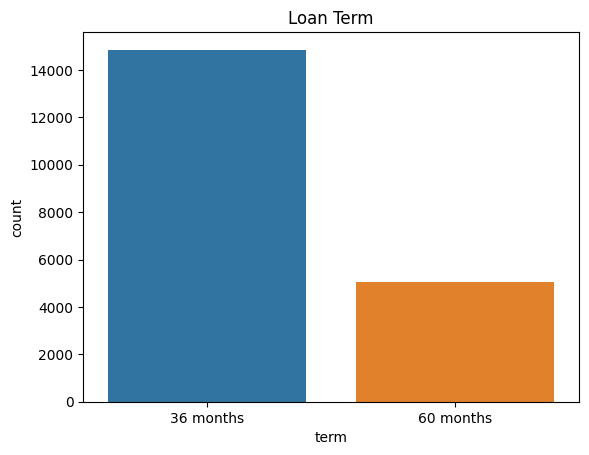

In [19]:
ax = sns.countplot(x='term',data=loan_df, order=sorted(loan_df.term.unique()))
ax.set_title('Loan Term')

#### Interest Rate

<Axes: >

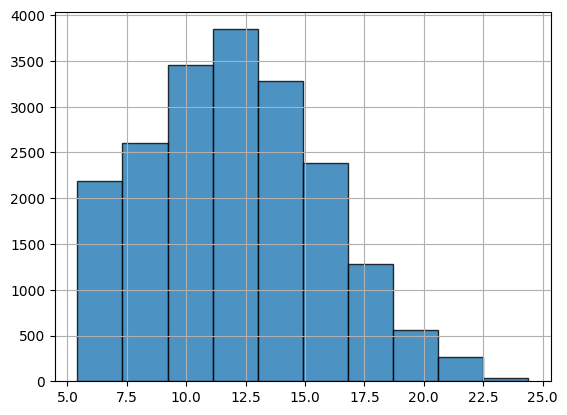

In [20]:
loan_df.int_rate.hist(edgecolor='black', alpha=0.8)

#### Average Interest Rate of Different Terms

In [21]:
loan_df.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0.5, 0, 'Loan Term')

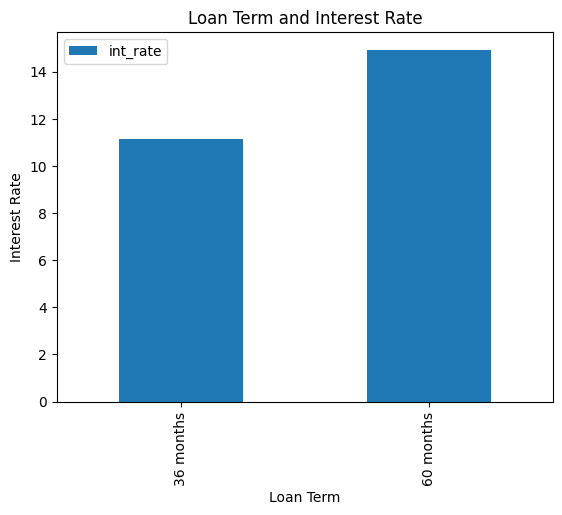

In [22]:
ax = loan_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = True)
ax.set_title('Loan Term and Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel("Loan Term")

### 1.4: Loan Grade
How many different loan grades there are in the dataset?

#### Your Code

In [23]:
loan_df.grade.value_counts()


B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: grade, dtype: int64

Text(0.5, 1.0, 'Grade')

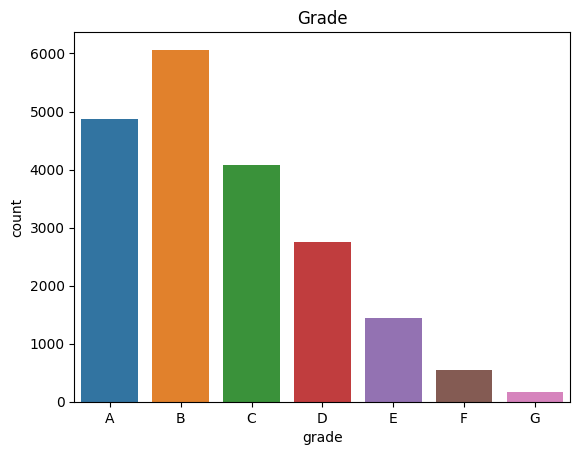

In [24]:
ax = sns.countplot(x='grade',data=loan_df, order=sorted(loan_df.grade.unique()))
ax.set_title('Grade')

### 1.5: Loan Grade and Interest Rate

Exploring the relationship between loan grade and interest rate.


Text(0, 0.5, 'Interest')

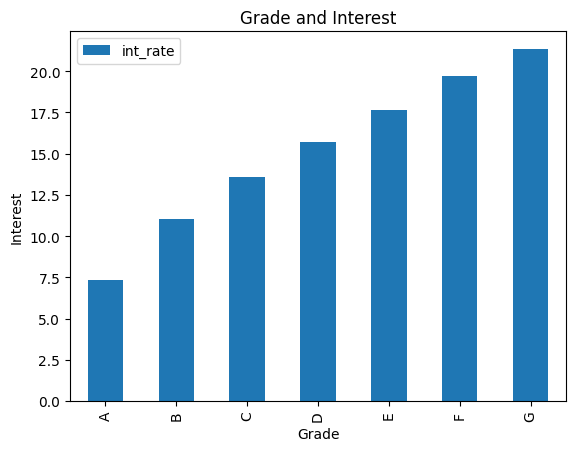

In [25]:
ax=loan_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend=True)
ax.set_title('Grade and Interest')
ax.set_xlabel('Grade')
ax.set_ylabel('Interest')


### 1.6: Loan by State

There are loans from six States in the dataset. Exploring the count of loans in each state via visualization.



Text(0.5, 1.0, 'addr_state')

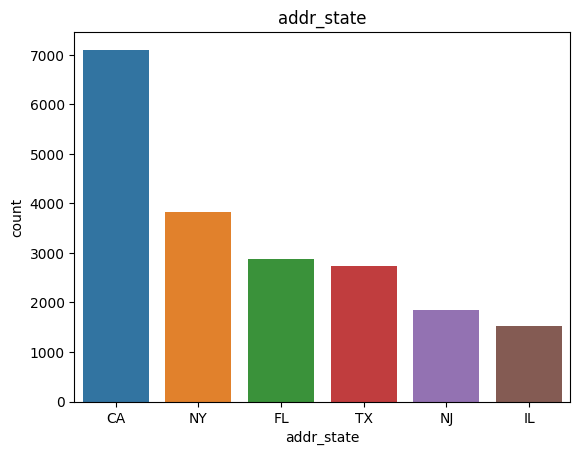

In [26]:
ax = sns.countplot(x='addr_state',data=loan_df, order=loan_df.addr_state.value_counts().index)
ax.set_title('addr_state')

### 1.7: Borrowers Annual Income Distribution

- Ploting a histogram of all borrower's annual income.
- Ploting another histogram of annual income that is less than $250,000.


<Axes: >

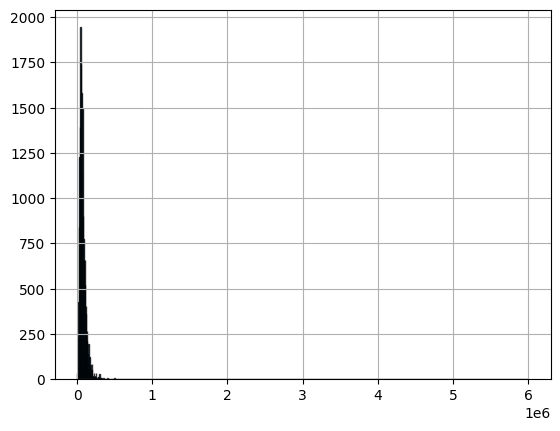

In [28]:
loan_df.annual_inc.hist(edgecolor='black',alpha=.8, bins=1000)

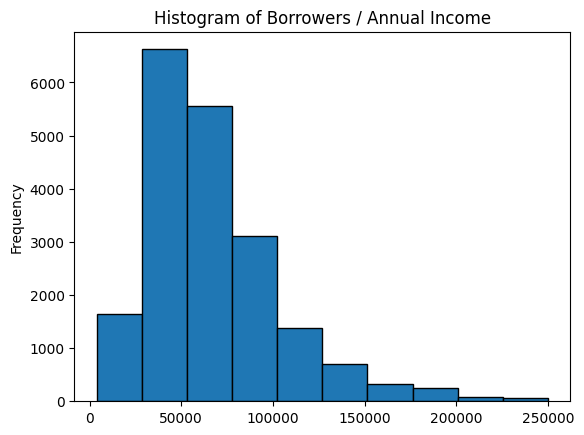

In [29]:
filtered_data=loan_df[loan_df['annual_inc']<250000]
plt.hist(filtered_data['annual_inc'],bins=10, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Histogram of Borrowers / Annual Income')
plt.show()

### 1.8: Borrower Annual Income by State

- Viusalizing **median** income of borrowers from each state with a bar chart.
 - Grouping by addr_state column.
 - Applying aggregate function median on annual_inc column.


Text(0.5, 1.0, 'State wise median annual income')

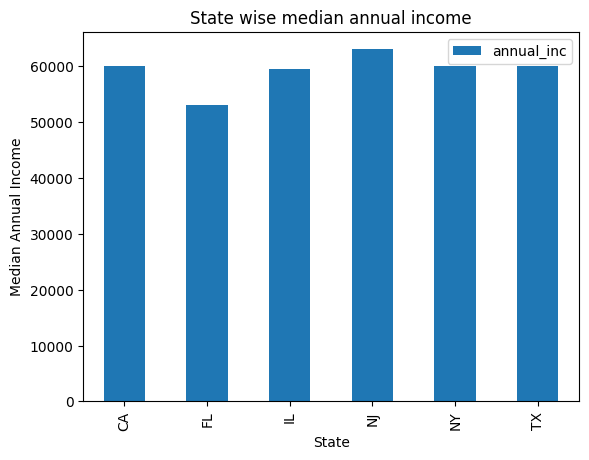

In [30]:
ax=loan_df.groupby('addr_state').agg({'annual_inc':'median'}).plot.bar()
ax.set_xlabel("State")
ax.set_ylabel("Median Annual Income")
ax.set_title('State wise median annual income')

### 1.9: Annual Income and Interest Rate

- Plotting a scatter plot on annual income and interest rate
- Plotting another scatter plot with annual income less than $300,000


#### Your Code

Text(0.5, 1.0, 'Scatter plot')

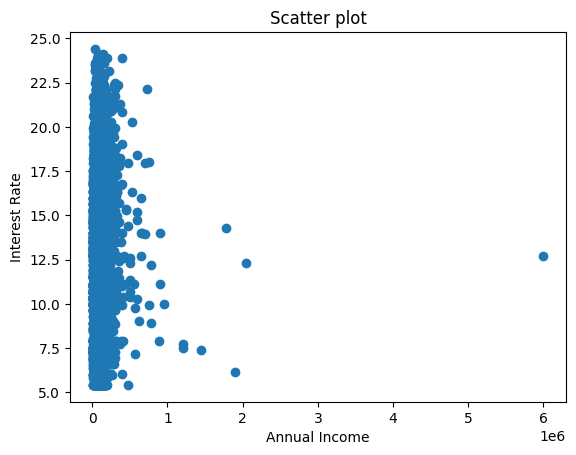

In [31]:
plt.scatter(loan_df.annual_inc, loan_df.int_rate)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.title('Scatter plot')


In [32]:
filterdata=loan_df[loan_df['annual_inc']<300000]
filterdata.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


Text(0.5, 1.0, 'Scatter plot')

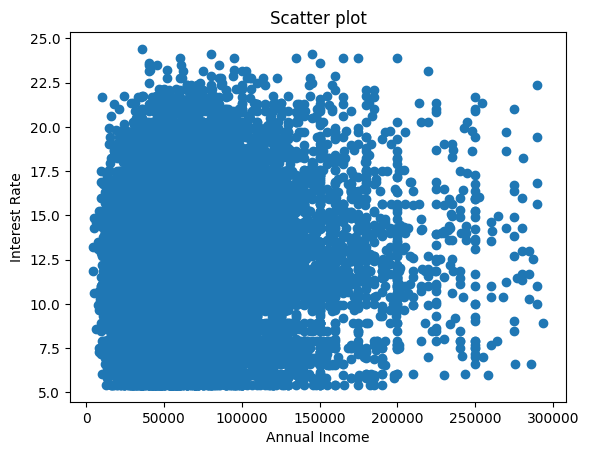

In [33]:
filterdata=loan_df[loan_df['annual_inc']<300000]
plt.scatter(filterdata.annual_inc, filterdata.int_rate)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.title('Scatter plot')


### 1.10: Convert Date Column

- Converting the **issue_d** column to a datetime type
- Creating a new column, **issue_year**, and set it to the year a loan is issued
- Displaying the first five rows

In [34]:
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'])
loan_df['issue_d'].head()


0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [35]:
loan_df['issue_year']=loan_df['issue_d'].dt.year
loan_df['issue_year'].head(5)

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

### 1.11: Loan Issued Over Year

Exploring the number of loans issued through LendingClub from 2007-2011.
- Getting a count of loans in each year
- Plotting a line chart to see the trend, x axis is year, y axis is count.

Text(0.5, 1.0, 'Loans issued in a particular year')

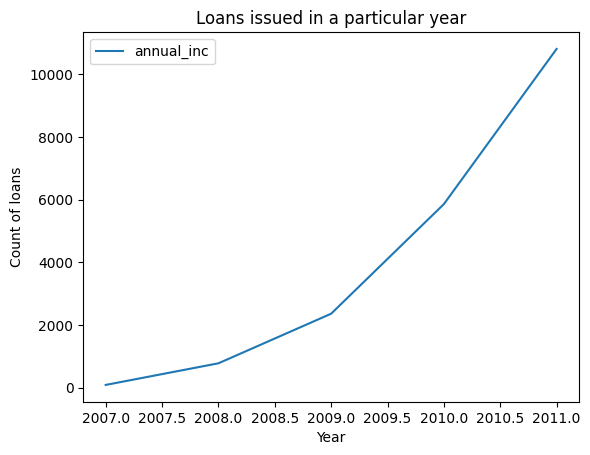

In [36]:
ax= loan_df.groupby('issue_year').agg({'annual_inc':'count'}).plot.line()
ax.set_xlabel("Year")
ax.set_ylabel('Count of loans')
ax.set_title('Loans issued in a particular year')

### 1.12: Interest Rate Change

Exploring the interest rate change in each state over the years.

- Creating pivot table, set
  - index to issue_year
  - columns to addr_state
  - values to int_rate
  - aggfunc to median
- Plotting a line chart to compare median interest rate change over years of the 6 states.


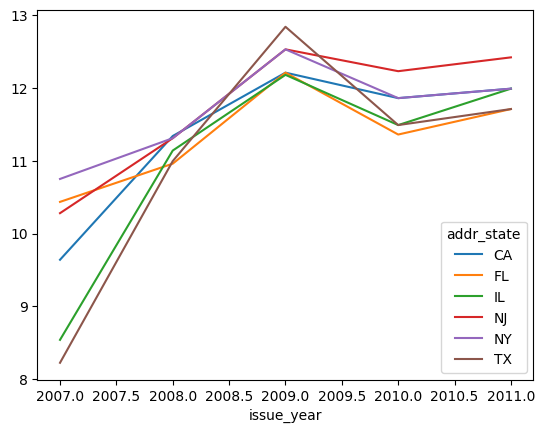

In [37]:
ax=loan_df.pivot_table(index='issue_year',columns='addr_state',values='int_rate',aggfunc='median').plot.line()

### 1.13: Loan Status

The loans in the dataset were issued before 2011 and the longest loan term is 5 years. So all the loans are either paid off or charged off.

Exploring loan status and finding out:
- The number of paid off loans and charged off loans
- Paid off rate of the whole dataset.

$PaidOffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$


In [38]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
a=loan_df[loan_df['loan_status']=='Fully Paid']
b=loan_df[loan_df['loan_status']=='Charged Off']
a_c=a.loan_status.count()
b_c=b.loan_status.count()
Paid_Off_rate=a_c/(a_c+b_c)*100
Paid_Off_rate


85.21699819168174

### 1.14: Loan Term and Loan Status

Exploring the payoff rate of three- and five-year loans.

 Calculating the paid off rate for each loan term with formula $payoffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$.
- Displaying the pivot table.


In [40]:
pt_term=loan_df.pivot_table(index='term',columns='loan_status',values='int_rate',aggfunc='count')
pt_term['payoffRate']=pt_term['Fully Paid']/(pt_term['Fully Paid']+pt_term['Charged Off'])
pt_term

loan_status,Charged Off,Fully Paid,payoffRate
term,,,
36 months,1728,13124,0.883652
60 months,1215,3841,0.759691


### 1.15: Loan Grade and Loan Status

Exploring the payoff rate of different loan grade.

Calculating the paid off rate for each loan grade with formula $payoffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$.
- Displaying the pivot table.

In [ ]:
pt_grade=loan_df.pivot_table(index='grade',columns='loan_status',values='int_rate',aggfunc='count')
pt_grade['payoffRate']=pt_grade['Fully Paid']/(pt_grade['Fully Paid']+pt_grade['Charged Off'])
pt_grade

loan_status,Charged Off,Fully Paid,payoffRate
grade,,,
A,304,4571,0.937641
B,779,5286,0.871558
C,672,3415,0.835576
D,579,2169,0.789301
E,378,1056,0.736402
F,174,366,0.677778
G,57,102,0.641509




##  2: Data Preparation, Modeling and Model Evaluation


## Data Preparation

Data preparation cleans up data, deals with missing values and creates new features through feature engineering.

### Loan Status

The dataset has loans initiated from 2007 to 2011. All loans have been either fully paid or charged off. So I will create a 'repaid' column in loan_df by encoding loan status and map Charged Off to 0 and Fully Paid to 1.



In [41]:
loan_df.loan_status.value_counts()

Fully Paid     16965
Charged Off     2943
Name: loan_status, dtype: int64

In [42]:
mapping_dict = {'Charged Off':0, 'Fully Paid':1}
loan_df['repaid'] = loan_df.loan_status.map(mapping_dict)
loan_df.repaid.value_counts()


1    16965
0     2943
Name: repaid, dtype: int64

### Paid Off Rate
With the newly created repaid column, I can calculate paid-off rate of all the loans in the dataset with the mean value of the column, which is about 85%, as shown in the next code cell.

In [43]:
loan_df.repaid.mean()

0.8521699819168174


### 2.1: Loan Term in Year

Creating a new column `loan_term_year` in loan_df, which has integer value 3 if the loan term is '36 months', and 5 if the loan term is '60 months'.

Then calculating repaid rate of loans with different loan_term_year.

In [44]:
mapping_loanterm={'36 months':3,'60 months':5}
loan_df['loan_term_year']=loan_df.term.map(mapping_loanterm)
loan_df.loan_term_year.head()

0    3
1    3
2    3
3    5
4    5
Name: loan_term_year, dtype: int64

In [45]:
repaid_rate=loan_df.groupby('loan_term_year').agg({'repaid':'mean'})
repaid_rate

,repaid
loan_term_year,
3,0.883652
5,0.759691


### 2.2: Encode Categorical Features

Exploring the relationship between following categorical features and repaid.
- purpose
- grade
- home_ownership
- addr_state

Then encoding them with label encoding and creating following new columns in loan_df.

- purpose_code
- grade_code
- home_ownership_code
- addr_state_code

Checking if there are missing values in the newly created features.


In [46]:
#relationship between purpose and repaid rate
loan_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
purpose,,
small_business,0.728177,905
educational,0.801242,161
house,0.823864,176
moving,0.829653,317
other,0.843689,2060
debt_consolidation,0.845670,9389
medical,0.854286,350
vacation,0.859296,199
renewable_energy,0.862745,51


In [47]:
#encode purpose to create purpose_code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
loan_df['purpose_code'] = le.fit_transform(loan_df.purpose)

loan_df['purpose_code'].head()

0    11
1     9
2     0
3    11
4     9
Name: purpose_code, dtype: int64

In [48]:
loan_df['purpose'].head()

0    small_business
1             other
2               car
3    small_business
4             other
Name: purpose, dtype: object

#### Your Code

In [49]:
loan_df['grade_code'] = le.fit_transform(loan_df.grade)
loan_df.grade_code.head()

0    2
1    2
2    4
3    5
4    1
Name: grade_code, dtype: int64

In [50]:
loan_df.grade.head()

0    C
1    C
2    E
3    F
4    B
Name: grade, dtype: object

In [51]:
loan_df['home_ownership_code'] = le.fit_transform(loan_df.home_ownership)
loan_df.home_ownership_code.head()

0    4
1    4
2    4
3    3
4    4
Name: home_ownership_code, dtype: int64

In [52]:
loan_df.home_ownership.head()

0    RENT
1    RENT
2    RENT
3     OWN
4    RENT
Name: home_ownership, dtype: object

In [53]:
loan_df['addr_state_code'] = le.fit_transform(loan_df.addr_state)
loan_df.addr_state_code.head()

0    2
1    0
2    0
3    0
4    5
Name: addr_state_code, dtype: int64

In [54]:
loan_df.addr_state_code.isnull().sum()

0

### 2.3: Manage Missing Values

- Filling missing values in `revol_util` with the mean value of the column in loan_df.
- Filling missing values in `pub_rec_bankruptcies` with 0 (which is the mode of the column) in loan_df.

After the missing values are filled, checking loan_df again to make sure there is no missing values in the two columns.

In [55]:
loan_df['revol_util'].fillna(loan_df['revol_util'].mean(), inplace = True)

In [56]:
loan_df.revol_util.isnull().sum()

0

In [57]:
loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)
loan_df.pub_rec_bankruptcies.isnull().sum()

0

## Modeling and Model Evaluation

Constructing a classification model to predict whether a loan will be fully paid. Column 'repaid' will be the label. The purpose of the model is to identify loans that are likely to be fully paid.

I will complete following steps:
- Identify columns we need for modeling and the next steps.
- Create a clean DataFrame `df` with needed columns only.
- Split the DataFrame to train and test.
- Identify columns needed to train the classification model.
- Create train and test set for the classification model.
- Create train and test label for the classification model.
- Train the classification model.
- Predict with the classification model.
- Evaluate the classification model.

I will demonstrate these steps with RandomForestClassifier.

### Keep Columns

I will create a clean DataFrame `df` which keeps following columns in the original DataFrame `loan_df`.
- funded_amnt
- loan_term_year
- int_rate
- grade_code
- purpose_code
- addr_state_code
- home_ownership_code
- annual_inc
- dti
- revol_util
- pub_rec_bankruptcies
- repaid
- total_pymnt

Among all keeped columns, repaid will be the label, total_pymnt will be used to calculate portfolio return in the next step. Other featues will be used to train classification models.

Only features that are available before the loan is initiated can be used in the classification. Features like recoveries, total_rec_prncp, which are only available after the loan is closed, will not be included in the training features.

In [58]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,grade_code,home_ownership_code,addr_state_code
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1,3,11,2,4,2
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1,3,9,2,4,0
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1,3,0,4,4,0
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0,5,11,5,3,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0,5,9,1,4,5


In [59]:
#columns needed for the classification AND the next steps
keep_columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code',
                'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

In [60]:
#Create a clean DataFrame
df = loan_df[keep_columns].copy()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           19908 non-null  int64  
 1   loan_term_year        19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   grade_code            19908 non-null  int64  
 4   purpose_code          19908 non-null  int64  
 5   addr_state_code       19908 non-null  int64  
 6   home_ownership_code   19908 non-null  int64  
 7   annual_inc            19908 non-null  float64
 8   dti                   19908 non-null  float64
 9   revol_util            19908 non-null  float64
 10  pub_rec_bankruptcies  19908 non-null  float64
 11  repaid                19908 non-null  int64  
 12  total_pymnt           19908 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


### Split DataFrame to Train and Test

- Splitting the clean DataFrame `df` to `df_train` and `df_test`.
- Creating train and test features, `d_train` and `d_test`.
- Creating train and test labels, `l_train` and `l_test`.

For demonstration, I will use following features for the classification model:
- funded_amnt
- purpose_code
- addr_state_code
- home_ownership_code
- annual_inc
- dti
- revol_util
- pub_rec_bankruptcies


In [62]:
#columns for the classification
model_columns = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc',
                 'dti', 'revol_util', 'pub_rec_bankruptcies']

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
d_train = df_train[model_columns]
d_test = df_test[model_columns]
l_train = df_train.repaid
l_test = df_test.repaid

### Random Forest Classifier

I will demonstrate the classification with two Random Forest Classifiers. The first one with default hyperparameters and the second one with `class_weight='balanced'`. We set `random_state=23` in both classifiers just to ensure repeatability.

The first classifier achieve accuracy rate 83.5%, which is actually worse than the zero model. A zero model always predicts with the majority class, which is 1 in the dataset. Since the overal repaid rate is 85.2%, so the accuracy rate of the zero model is 85.2%.

In this project, the accuracy rate is not what we are looking for. The purpose of the classification model is to help us select loans that are more likely to be repaid. So our focus is on the precision rate of class 1. From the classification report of the first model, we can see that the precision rate of class 1 is 0.86, or 86%. This means among all the loans identified as to be fully paid by the classification model, 86% of them are actually fully paid. This is a not much better than the repaid rate of the whole test set, which is about 85%. The reason is that the model only has 0.07 recall rate on class 0, which means, for all loans that are charged off, the model only identifies 7% of them as charged off.

The dataset is highly imbalanced, with 85% class 1 and 15% class 0, we can achieve better class 1 precision by setting balanced class_weight. In the second model, we set `class_weight='balanced'`. The default RandomForestClassifier is not very senstive to class_weight change, so we also limit `max_depth` to increase the effectiveness of class_weight change.

From the classification report of the second Random Forest Classifier, we can see that even though the accuracy rate drops to 65%, the model has a lot larger class 0 recall at 0.44. It means the model identifies 44% of all charged off loans correctly. More importantly, we get better class 1 precission, 88%, which means, among all loans that are predicted as to be fully paid by the model, 88% of them are actually fully paid.

We can also see the prediction details from the confusion matrix.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create Regressor with default properties
rfc1 = RandomForestClassifier(random_state=23)

# Fit estimator and display score
rfc1 = rfc1.fit(d_train, l_train)
print(f'Accuracy Score: {rfc1.score(d_test, l_test)}')
pred = rfc1.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.8496986438975389
Confusion Matrix:
[[   9 1177]
 [  20 6758]]
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.01      0.01      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.58      0.50      0.47      7964
weighted avg       0.77      0.85      0.78      7964



In [65]:
#zero model accuracy
df_test.repaid.mean()

0.8510798593671521

In [66]:
rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc2 = rfc2.fit(d_train, l_train)
print(f'Accuracy Score: {rfc2.score(d_test, l_test)}')
pred = rfc2.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.6761677548970366
Confusion Matrix:
[[ 535  651]
 [1928 4850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.45      0.29      1186
           1       0.88      0.72      0.79      6778

    accuracy                           0.68      7964
   macro avg       0.55      0.58      0.54      7964
weighted avg       0.78      0.68      0.72      7964



### 2.4: Logistic Regression with Default Class Weight

Constructing a Logistic Regression model with default class_weight. Training and evaluating the model.


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(d_train, l_train)
predictions = model.predict(d_test)
accuracy = accuracy_score(l_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8510798593671521


### 2.5: Logistic Regression with Balanced Class Weight

Constructing a Logistic Regression model with `class_weight='balanced'`. Training and evaluating the model.

Using the same features as the first LogisticRegression model.


In [68]:
model=LogisticRegression(class_weight='balanced')
model.fit(d_train, l_train)
predictions = model.predict(d_test)
accuracy = accuracy_score(l_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.48329984932194875


Here, as accuracy of Random forest classifier is better, hence we will use Random Forest Classifier for Building the loan portfolio

### Portfolio Annual Return

Calculation of loan return is very complicated since the loan is paid by monthly installments. In this project, I simplified the calculation by using the total payment and funded amount. We can use following formula to calculate the total return:

$TotalReturn = \frac{Total Payment}{Funded Amount} - 1$

The total return doesn't reflect loan profitability since loans have different terms. It's more accurate to compare annual returns. There are only two terms in the dataset, 36 months and 60 months. The formula to calculate annual return is:

$Annualized Return = (1+Total Return)^{(1/years)} - 1$.

For example, if total return of a 36 month loan is 10%, then annualized return = `(1 + 0.1)**(1/3) - 1` = `0.032`.

This is not the true annualized return of a loan. But the goal of this project is to identify loans to invest, so we just need a benchmark to evaluate loan portfolio performance.

In the following code cells, we define a function to calculate annual return of a loan portfolio. The function calculates annual return for 36 month and 60 month loans in a portfolio separately.

Then we use the `get_portfolio_annual_return()` function to find out the annual returns of all 36 months and 60 months loans in the test dataset. There are 5960 36 months loans, with annual return 2.69%, and 2004 60 months loans, with annual return 2.74%.


In [90]:
def get_portfolio_annual_return(df):
    '''
    Get annual return of 36 and 60 month loans in the portfolio df.
    '''
    annual_return_36, annual_return_60 = 0, 0
    df_36 = df[df.loan_term_year==3]
    if(len(df_36)>0):
        return_36 = df_36.total_pymnt.sum()/df_36.funded_amnt.sum()-1
        annual_return_36 = (1+return_36)**(1/3)-1
    df_60 = df[df.loan_term_year==5]
    if(len(df_60)>0):
        return_60 = df_60.total_pymnt.sum()/df_60.funded_amnt.sum()-1
        annual_return_60 = (1+return_60)**(1/5)-1
    print (f'36 months loan:{len(df_36)}, Annual return:{round(annual_return_36, 4)}')
    print (f'60 months loan:{len(df_60)}, Annual return:{round(annual_return_60, 4)}')

In [70]:
#get return of the test set.
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


### Construct Loan Portfolio with RandomForestClassifier

I will use the RandomForestClassifier model with `class_weight='balanced'` (rfc2) to select loans from the test set. Then we will compare the annual return of the selected loans with that of the test set.

The RandomForestClassifier mode selects 4121 loans from 5960 36 months loans, with annual return 2.95%; and selects 1233 loans from 2004 60 months loans, with annual return 2.87. The portfolio achieves better return on both 36 months loans and 60 months loans comparing to the whole test set, which are 2.69% and 2.74% respectively.


In [91]:
keep_columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code',
                'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

df = loan_df[keep_columns].copy()

model_columns = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc',
                 'dti', 'revol_util', 'pub_rec_bankruptcies']

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
d_train = df_train[model_columns]
d_test = df_test[model_columns]
l_train = df_train.repaid
l_test = df_test.repaid

rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc2 = rfc2.fit(d_train, l_train)
pred = rfc2.predict(d_test)

# create prediction column in the test set.
df_test['prediction'] = pred
portfolio_rfc2 = df_test[df_test.prediction==1]

In [92]:
portfolio_rfc2.sample(20)

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
12111,10000,3,6.54,0,2,0,4,75000.0,18.27,50.1,0.0,1,11040.406014,1
19791,7200,3,12.36,3,9,4,4,17280.0,4.58,0.0,0.0,1,8653.732987,1
1136,20000,5,12.42,1,2,4,4,80000.0,15.48,63.1,0.0,1,22031.386995,1
4539,6000,3,11.99,1,1,0,4,65000.0,4.50,66.5,0.0,1,7153.725843,1
8639,6000,3,10.37,1,2,0,4,85000.0,6.58,55.3,0.0,1,6575.244652,1
11020,25000,3,9.99,1,1,2,4,48000.0,19.40,57.6,0.0,1,29037.951035,1
255,10400,3,12.69,1,1,0,4,44000.0,19.91,90.1,0.0,1,12559.160014,1
9896,16000,5,15.28,3,2,4,4,42000.0,15.77,38.9,0.0,1,20609.185447,1
14904,14725,5,7.88,0,4,1,0,60000.0,10.44,21.7,0.0,1,16845.988546,1
12583,6000,3,7.14,0,9,3,4,26004.0,5.54,21.3,0.0,1,6681.037486,1


In [93]:
df_test.repaid.mean()

0.8510798593671521

In [94]:

portfolio_rfc2.repaid.mean()

0.8816578803853845

In [95]:

get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [96]:
#return of the loan portfolio selected by rfc2
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4223, Annual return:0.0295
60 months loan:1278, Annual return:0.0306


### Impact of Loan Term

In the RandomForestClassifier demo, I didn't include loan term in the training features. But as shown in 2.1, 36 months loans have much higher paid-off rate than that of 60 months loans. It seems obvious that loan term should be included in the training feature.

In the following code cells, I will add loan_term_year to the training feature and train the RandomForestClassifier with class_weight='balanced'.

First, I will add loan_term_year to model_columns.
Then, I will create d_train with the new model_columns.
Then, I will train and predict with the RandomForestClassifier.
Fianlly, i will check the portfolio return.

Comparing to the portfolio selected by rfc2, in the new portfolio, 36 months loan return drops a bit and 60 months loan return increases a bit. But the biggest impact is that in the new portfolio, there are 10 times more 36 months loans than 60 months loans. While in the dataset, the ratio is about 3 to 1. The reason is that since 36 months loans have much higher repaid rate, when we set class_weight='balanced', the model will bias toward 36 months loans.

In [77]:
#check repaid rate of 36 months loans and 60 months loans
loan_df.groupby('loan_term_year').agg({'repaid':'mean'})

,repaid
loan_term_year,
3,0.883652
5,0.759691


In [98]:
# Add loan_term_year to training feature
model_columns2 = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc',
                'dti', 'revol_util', 'pub_rec_bankruptcies', 'loan_term_year']
d_train = df_train[model_columns2]
d_test = df_test[model_columns2]

# Train RandomForestClassifier with new features
rfc3 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc3 = rfc3.fit(d_train, l_train)
pred = rfc3.predict(d_test)

# Create portfolio and check return
df_test['prediction'] = pred
portfolio_rfc3 = df_test[df_test.prediction==1]
#return of the loan portfolio selected by rfc3
get_portfolio_annual_return(portfolio_rfc3)


36 months loan:5226, Annual return:0.0278
60 months loan:404, Annual return:0.0331


In [79]:
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4223, Annual return:0.0295
60 months loan:1278, Annual return:0.0306


In [80]:
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [99]:
#Check number of 36 months and 60 months loans
portfolio_rfc3.loan_term_year.value_counts()

3    5226
5     404
Name: loan_term_year, dtype: int64

### Improvements with Filters

pub_rec_bankruptcies is the number of public record bankruptcies of a loan borrower. As show in the next code cell, vast majority of loans have pub_rec_bankruptcies = 0, which means no public record of bankruptcies.


In [100]:
df.pub_rec_bankruptcies.value_counts()

0.0    19165
1.0      742
2.0        1
Name: pub_rec_bankruptcies, dtype: int64

I may include pub_rec_bankruptcies in the training features. Another way is to use it as a filter. In the next code cell, I check returns of loans with and without public record bankruptcies in the data set.

In [101]:
#returns of loans without bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies==0])

36 months loan:14316, Annual return:0.029
60 months loan:4849, Annual return:0.029


In [84]:
#returns of loans with bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies>0])

36 months loan:536, Annual return:0.0156
60 months loan:207, Annual return:0.0198


Since loans without public bankruptcies recrods have significantly higher returns, I will filter out all loans that have public bankruptcies recrods from the portfolio determined by rfc2. The new portfolio has a little better return as shown in the following code cell.

In [102]:
portfolio_rfc2_no_prb = portfolio_rfc2[portfolio_rfc2.pub_rec_bankruptcies==0]
get_portfolio_annual_return(portfolio_rfc2_no_prb)

36 months loan:4078, Annual return:0.0299
60 months loan:1219, Annual return:0.0319


Now, we can use this model to find the portfolio of loans that an investor should likely invest in considering that the loan will be repaid

Thanks for your attention!